<a href="https://colab.research.google.com/github/shikharmay7/DeepLearningChallenge/blob/master/DanceFormsIdenv2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Datasets/DanceForms/train.csv')
test_df = pd.read_csv('/content/drive/My Drive/Datasets/DanceForms/test.csv')

In [0]:
train_base = '/content/drive/My Drive/Datasets/DanceForms/train/'
test_base = '/content/drive/My Drive/Datasets/DanceForms/test/'

In [0]:
Image = train_df['Image']
target = train_df['target']

In [0]:
train=[]
for i in range(train_df.shape[0]):
  path = train_base + Image[i]
  train.append(path)

In [7]:
# Importing Keras libraries
from keras.utils import np_utils
from keras.models import Sequential
from keras.applications import VGG16
from keras.applications import imagenet_utils
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, GlobalAveragePooling2D

Using TensorFlow backend.


In [0]:
def show_imgs(X):
    plt.figure(figsize=(8, 8))
    k = 0
    for i in range(0,4):
        for j in range(0,4):
            image = load_img(train[k], target_size=(224, 224))
            plt.subplot2grid((4,4),(i,j))
            plt.imshow(image)
            k = k+1
    # show the plot
    plt.show()

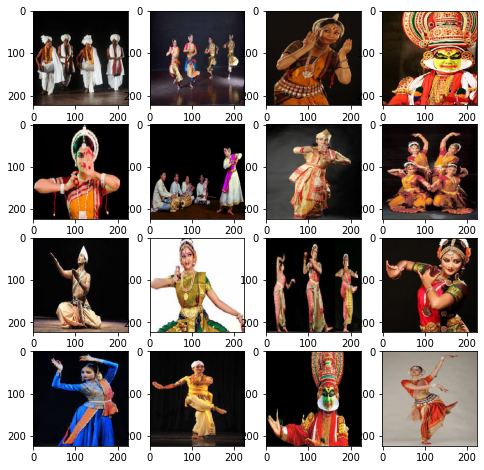

In [9]:
show_imgs(train)

In [0]:


train_dict =  {'manipuri':0,
               'bharatanatyam':1,
               'odissi':2,
               'kathakali':3,
               'kathak':4,
               'sattriya':5,
               'kuchipudi':6,
               'mohiniyattam':7}
inv_dict = {0:'manipuri',
               1:'bharatanatyam',
               2:'odissi',
               3:'kathakali',
               4:'kathak',
               5:'sattriya',
               6:'kuchipudi',
               7:'mohiniyattam'}



In [0]:
train_y=[]
for i in range(train_df.shape[0]):
  train_y.append(train_dict[target[i]])

Training data available in 8 classes
[36, 47, 49, 47, 44, 45, 46, 50]


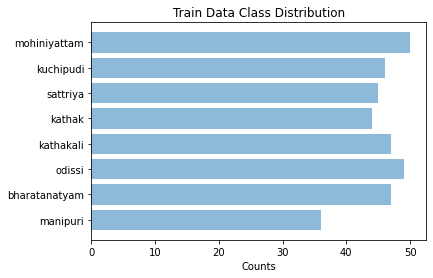

In [12]:

print("Training data available in 8 classes")
print([train_y.count(i) for i in range(8)])
 
Dance_classes = ['manipuri','bharatanatyam','odissi','kathakali','kathak','sattriya','kuchipudi','mohiniyattam']
 
y_pos = np.arange(len(Dance_classes))
counts = [train_y.count(i) for i in range(8)]
 
plt.barh(y_pos, counts, align='center', alpha=0.5)
plt.yticks(y_pos, Dance_classes)
plt.xlabel('Counts')
plt.title('Train Data Class Distribution')
plt.show()


In [0]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train, train_y, test_size = 0.20, random_state = 42)

In [14]:
model = VGG16(weights="imagenet", include_top=False) #removes the dense layers
model.summary()

58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
______________________________________________________________

In [0]:


def getFeatures(dataset, pre_model):
  x_scratch = []
  for img_path in dataset:
    image = load_img(img_path, target_size=(224,224))
    image = img_to_array(image)
    image = np.expand_dims(image,axis = 0)
    image = imagenet_utils.preprocess_input(image)
    x_scratch.append(image)

  x = np.vstack(x_scratch)
  features = pre_model.predict(x,batch_size=8)
  features_flatten = features.reshape(features.shape[0],7*7*512)
  return x, features, features_flatten



In [0]:
train_x, train_x_features, train_x_features_flatten = getFeatures(x_train,model)
test_x, test_x_features, test_x_features_flatten = getFeatures(x_test, model)

In [0]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
parameters = {
    "n_estimators":[5,10,50,100,250],
    "max_depth":[2,4,8,16,32,None]   
}

In [20]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(train_x_features_flatten,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [0]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean,std,params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} + or -{round(std,3)} for the {params}')

In [22]:
display(cv)

Best parameters are: {'max_depth': 8, 'n_estimators': 250}


0.292 + or -0.029 for the {'max_depth': 2, 'n_estimators': 5}
0.257 + or -0.065 for the {'max_depth': 2, 'n_estimators': 10}
0.398 + or -0.071 for the {'max_depth': 2, 'n_estimators': 50}
0.381 + or -0.025 for the {'max_depth': 2, 'n_estimators': 100}
0.423 + or -0.031 for the {'max_depth': 2, 'n_estimators': 250}
0.264 + or -0.037 for the {'max_depth': 4, 'n_estimators': 5}
0.402 + or -0.049 for the {'max_depth': 4, 'n_estimators': 10}
0.488 + or -0.046 for the {'max_depth': 4, 'n_estimators': 50}
0.557 + or -0.058 for the {'max_depth': 4, 'n_estimators': 100}
0.584 + or -0.053 for the {'max_depth': 4, 'n_estimators': 250}
0.319 + or -0.062 for the {'max_depth': 8, 'n_estimators': 5}
0.385 + or -0.045 for the {'max_depth': 8, 'n_estimators': 10}
0.543 + or -0.046 for the {'max_depth': 8, 'n_estimators': 50}
0.625 + or -0.061 for the {'max_depth': 8, 'n_estimators': 100}
0.656 + or -0.056 for the {'max_depth': 8, 'n_estimator

In [0]:
rf = RandomForestClassifier(n_estimators=100, max_depth=None)
rf.fit(train_x_features_flatten, y_train)


y_pred_train = rf.predict(train_x_features_flatten)
# predictions for test
y_pred_val = rf.predict(test_x_features_flatten)
    # training metrics
print("Training metrics:")
print(sklearn.metrics.classification_report(y_true= train_y, y_pred= y_pred_train))
    
    # test data metrics
print("Test data metrics:")
print(sklearn.metrics.classification_report(y_true= val_y, y_pred= y_pred_val))